# 📝 Exercise M7.02

We presented different classification metrics in the previous notebook.
However, we did not use it with a cross-validation. This exercise aims at
practicing and implementing cross-validation.

Here we use the blood transfusion dataset.

In [2]:
import pandas as pd

blood_transfusion = pd.read_csv("./datasets/blood_transfusion.csv")
data = blood_transfusion.drop(columns="Class")
target = blood_transfusion["Class"]

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

First, create a decision tree classifier.

In [3]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)


Create a `StratifiedKFold` cross-validation object. Then use it inside the
`cross_val_score` function to evaluate the decision tree. We first use
the accuracy as a score function. Explicitly use the `scoring` parameter of
`cross_val_score` to compute the accuracy (even if this is the default score).
Check its documentation to learn how to do that.

In [4]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

accuracy_scores = cross_val_score(
    tree, data, target, cv=cv, scoring="accuracy"
)

import pandas as pd
pd.Series(accuracy_scores, name="Accuracy")


0    0.733333
1    0.813333
2    0.746667
3    0.733333
4    0.560000
5    0.693333
6    0.733333
7    0.800000
8    0.608108
9    0.675676
Name: Accuracy, dtype: float64

Repeat the experiment by computing the `balanced_accuracy`.

In [5]:
balanced_accuracy_scores = cross_val_score(
    tree, data, target, cv=cv, scoring="balanced_accuracy"
)

pd.Series(balanced_accuracy_scores, name="Balanced Accuracy")


0    0.634503
1    0.744152
2    0.605263
3    0.615497
4    0.406433
5    0.551170
6    0.634503
7    0.678363
8    0.477296
9    0.541796
Name: Balanced Accuracy, dtype: float64

We now add a bit of complexity. We would like to compute the precision of
our model. However, during the course we saw that we need to mention the
positive label which in our case we consider to be the class `donated`.

We can show that computing the precision without providing the positive label
is not supported by scikit-learn because it is indeed ambiguous.

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
try:
    scores = cross_val_score(
        tree, data, target, cv=10, scoring="precision", error_score="raise"
    )
except ValueError as exc:
    print(exc)

pos_label=1 is not a valid label: It should be one of ['donated' 'not donated']


<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last">We use a <tt class="docutils literal">try</tt>/<tt class="docutils literal">except</tt> block to catch possible <tt class="docutils literal">ValueError</tt>s and print them
if they occur. By setting <tt class="docutils literal"><span class="pre">error_score="raise"</span></tt>, we ensure that the exception
is raised immediately when an error is encountered. Without this setting, the
code would show a warning for each cross-validation split before raising the
exception. You can try using the default <tt class="docutils literal">error_score</tt> to better understand
what this means.</p>
</div>
We get an exception because the default scorer has its positive label set to
one (`pos_label=1`), which is not our case (our positive label is "donated").
In this case, we need to create a scorer using the scoring function and the
helper function `make_scorer`.

So, import `sklearn.metrics.make_scorer` and
`sklearn.metrics.precision_score`. Check their documentations for more
information. Finally, create a scorer by calling `make_scorer` using the score
function `precision_score` and pass the extra parameter `pos_label="donated"`.

In [7]:
from sklearn.metrics import make_scorer, precision_score

precision_scorer = make_scorer(
    precision_score,
    pos_label="donated"
)


Now, instead of providing the string `"precision"` to the `scoring` parameter
in the `cross_val_score` call, pass the scorer that you created above.

In [8]:
precision_scores = cross_val_score(
    tree,
    data,
    target,
    cv=cv,
    scoring=precision_scorer
)

pd.Series(precision_scores, name="Precision")


0    0.466667
1    0.578947
2    0.416667
3    0.357143
4    0.105263
5    0.333333
6    0.473684
7    0.642857
8    0.200000
9    0.294118
Name: Precision, dtype: float64

`cross_val_score` can compute one score at a time, as specified by the scoring
parameter. In contrast, cross_validate can compute multiple scores by passing
a list of strings or scorers to the scoring parameter

Import `sklearn.model_selection.cross_validate` and compute the accuracy and
balanced accuracy through cross-validation. Plot the cross-validation score
for both metrics using a box plot.

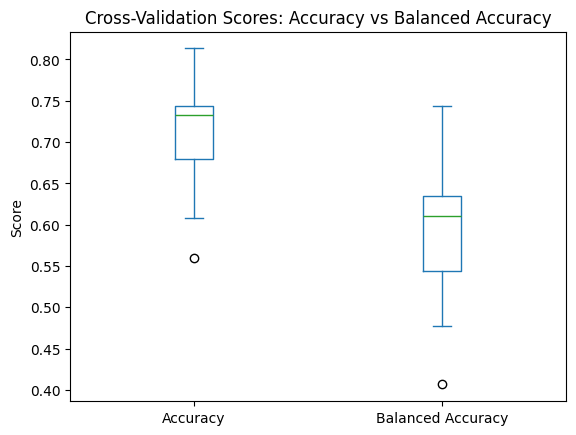

In [10]:
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier(random_state=0)


from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)


cv_results = cross_validate(
    tree,
    data,
    target,
    cv=cv,
    scoring=["accuracy", "balanced_accuracy"]
)


import pandas as pd
cv_df = pd.DataFrame({
    "Accuracy": cv_results["test_accuracy"],
    "Balanced Accuracy": cv_results["test_balanced_accuracy"]
})


cv_df.plot.box()
plt.ylabel("Score")
plt.title("Cross-Validation Scores: Accuracy vs Balanced Accuracy")
plt.show()
